# 1. The dataset

Walt Disney Studios is the foundation on which The Walt Disney Company was built.
The Studios has produced more than 600 films since their debut film, Snow White and the Seven Dwarfs in 1937.
While many of its films were big hits, some of them were not.

In this notebook, we will explore a dataset of Disney movies and analyze what contributes to the success of Disney movies.
First, we will take a look at the Disney data compiled by Kelly Garrett.
The data contains 579 Disney movies with six features: movie title, release date, genre, MPAA rating, total gross, and inflation-adjusted gross.

In [61]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [44]:
# Read the file into gross
gross = pd.read_csv('disney_movies_total_gross.csv', parse_dates=['release_date'])

# Printing gross
gross.head()

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,"$184,925,485","$5,228,953,251"
1,Pinocchio,1940-02-09,Adventure,G,"$84,300,000","$2,188,229,052"
2,Fantasia,1940-11-13,Musical,G,"$83,320,000","$2,187,090,808"
3,Song of the South,1946-11-12,Adventure,G,"$65,000,000","$1,078,510,579"
4,Cinderella,1950-02-15,Drama,G,"$85,000,000","$920,608,730"


## Data Cleaning

Replace the $ symbol with ' ' and convert the datatype to float

In [47]:
# Use lamda function to remove $ symbol and ','
gross['total_gross'] = gross['total_gross'].apply(lambda x: x.replace(',','').replace('$','')).astype(float)

# Do the same for inflation_adjusted_gross
gross['inflation_adjusted_gross'] = gross['inflation_adjusted_gross'].apply(lambda x: x.replace(',','').replace('$','')).astype(float)
gross.head()

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485.0,5.228953e+09
1,Pinocchio,1940-02-09,Adventure,G,84300000.0,2.188229e+09
2,Fantasia,1940-11-13,Musical,G,83320000.0,2.187091e+09
3,Song of the South,1946-11-12,Adventure,G,65000000.0,1.078511e+09
4,Cinderella,1950-02-15,Drama,G,85000000.0,9.206087e+08


# 2. Top ten movies at the box office

Let's started by exploring the data. We will check which are the 10 Disney movies that have earned the most at the box office.
We can do this by sorting movies by their inflation-adjusted gross (we will call it adjusted gross from this point onward).

In [30]:
# Sorting data by the adjusted gross in descending order
gross.sort_values(by=['inflation_adjusted_gross'])

# Display the top 10 movies
gross.head()

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross,release_year
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485.0,5.228953e+09,1937
1,Pinocchio,1940-02-09,Adventure,G,84300000.0,2.188229e+09,1940
2,Fantasia,1940-11-13,Musical,G,83320000.0,2.187091e+09,1940
3,Song of the South,1946-11-12,Adventure,G,65000000.0,1.078511e+09,1946
4,Cinderella,1950-02-15,Drama,G,85000000.0,9.206087e+08,1950


# 3. Movie genre trend

From the top 10 movies above, it seems that some genres are more popular than others.
So, we will check which genres are growing stronger in popularity.
To do this, we will group movies by genre and then by year to see the adjusted gross of each genre in each year.

In [41]:
# Extract year from release_date and store it in a new column
gross['release_year'] = pd.DatetimeIndex(gross['release_date']).year

# Compute mean of adjusted gross per genre and per year
grouped_mean = gross.groupby(['genre', 'release_year']).mean()

# Convert the GroupBy object to a DataFrame
genre_yearly = grouped_mean.reset_index()

# Inspecting genre_yearly 
genre_yearly.head(10)
grouped_mean

total_gross  inflation_adjusted_gross
genre   release_year                                       
Action  1981                  0.0                       0.0
        1982           26918576.0                77184895.0
        1988           17577696.0                36053517.0
        1990           59249588.5               118358772.0
        1991           28924936.5                57918572.5
...                           ...                       ...
Western 1995            8247627.0                15983331.0
        2000           56932305.0                89042541.0
        2003           58331254.0                81547672.0
        2004           44846546.5                60878640.0
        2013           89302115.0                92597388.0

[218 rows x 2 columns]

# 4. Visualize the genre popularity trend

We will make a plot out of these means of groups to better see how box office revenues have changed over time.

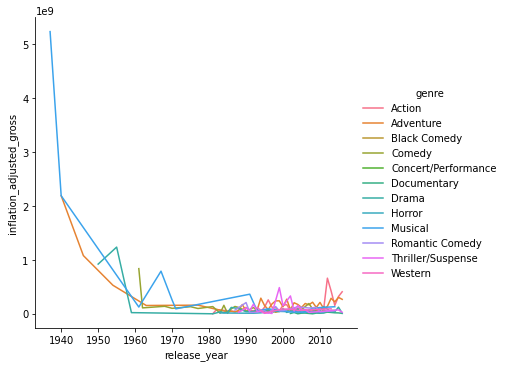

In [42]:
# Plot the data
sns.relplot(x='release_year', y='inflation_adjusted_gross', kind='line', hue='enre', data=genre_yearly)

# 5. Data transformation

The line plot supports our belief that some genres are growing faster in popularity than others. For Disney movies, Action and Adventure genres are growing the fastest. Next, we will build a linear regression model to understand the relationship between genre and box office gross.

Since linear regression requires numerical variables and the genre variable is a categorical variable, we'll use a technique called one-hot encoding to convert the categorical variables to numerical. This technique transforms each category value into a new column and assigns a 1 or 0 to the column.

For this dataset, there will be 11 dummy variables, one for each genre except the action genre which we will use as a baseline. For example, if a movie is an adventure movie, like The Lion King, the adventure variable will be 1 and other dummy variables will be 0. Since the action genre is our baseline, if a movie is an action movie, such as The Avengers, all dummy variables will be 0.

In [59]:
# Convert genre variable to dummy variables
genre_dummy = pd.get_dummies(gross['genre'], drop_first=True)
genre_dummy.head()

,Adventure,Black Comedy,Comedy,Concert/Performance,Documentary,Drama,Horror,Musical,Romantic Comedy,Thriller/Suspense,Western
0,0,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0


# 6. The genre effect

Now that we have dummy variables, we can build a linear regression model to predict the adjusted gross using these dummy variables.

From the regression model, we can check the effect of each genre by looking at its coefficient given in units of box office gross dollars. We will focus on the impact of action and adventure genres here. (Note that the intercept and the first coefficient values represent the effect of action and adventure genres respectively). We expect that movies like the Lion King or Star Wars would perform better for box office.

In [63]:
# Build a linear regression model
regr = LinearRegression()

# Fit regr to the dataset
regr.fit(genre_dummy, gross['inflation_adjusted_gross'])

# Get estimated intercept and coefficient values
action = regr.intercept_
adventure = regr.coef_[[0][0]]

# Inspecting the estimated intercept and coefficient values
print((action, adventure))

(102921757.36842033, 87475654.70909958)


# 7. Confidence intervals for regression parameters (i)
Next, we will compute 95% confidence intervals for the intercept and coefficients. The 95% confidence intervals for the intercept **a** and coefficient **b<sub>i</sub>** means that the intervals have a probability of 95% to contain the true value **a** and coefficient **b<sub>i</sub>** respectively. If there is a significant relationship between a given genre and the adjusted gross, the confidence interval of its coefficient should exclude 0.

We will calculate the confidence intervals using the pairs bootstrap method.

In [74]:
## Set up an index array and initialize replicate arrays for doing pairs bootstrap

# Create an array of indices to sample from with the values from 0 to len(gross['genre'])
inds = np.arange(len(gross['genre']))

# Initialize 500 replicate arrays using empty() method
size = 500
rs_action_reps = np.empty(size)
rs_adventure_reps = np.empty(size)

# 8. Confidence intervals for regression parameters (ii)
After the initialization, we will perform pair bootstrap estimates for the regression parameters. Note that we will draw a sample from a set of (genre, adjusted gross) data where the genre is the original genre variable. We will perform one-hot encoding after that.

In [75]:
# Performing pairs bootstrap for linear regression

# Generate replicates
for i in range(size):

    # Resample the indices
    rs_indx = np.random.choice(inds, size=len(inds))

    # Get the sampled genre and sampled adjusted gross
    rs_genre = gross['genre'][rs_indx]
    rs_ifgross = gross['inflation_adjusted_gross'][rs_indx]

    # Convert sampled genre to dummy variables
    rs_dummies = pd.get_dummies(rs_genre, drop_first=True)

    # Build and fit a regression model
    regr = LinearRegression().fit(rs_dummies, rs_ifgross)

    # Compute replicates of estimated intercept and coefficient
    rs_action_reps[i] = regr.intercept_
    rs_adventure_reps[i] = regr.coef_[[0][0]]

# 9. Confidence intervals for regression parameters (iii)
Finally, we compute 95% confidence intervals for the intercept and coefficient and examine if they exclude 0. If one of them (or both) does, then it is unlikely that the value is 0 and we can conclude that there is a significant relationship between that genre and the adjusted gross.

In [82]:
# Compute 95% confidence intervals for intercept and coefficient values
confidence_interval_action = np.percentile(rs_action_reps, [2.5, 97.5])
confidence_interval_adventure = np.percentile(rs_adventure_reps, [2.5, 97.5])
    
# Inspect the confidence intervals
print(confidence_interval_action)
print(confidence_interval_adventure)

[7.15169804e+07 1.41392884e+08]
[2.94822554e+07 1.41337477e+08]


# 10. Should Disney make more action and adventure movies?

The confidence intervals from the bootstrap method for the intercept and coefficient do not contain the value zero, as we have already seen that lower and upper bounds of both confidence intervals are positive. These tell us that it is likely that the adjusted gross is significantly correlated with the action and adventure genres.

From the results of the bootstrap analysis and the trend plot we have done earlier, we could say that Disney movies with plots that fit into the action and adventure genre, according to our data, tend to do better in terms of adjusted gross than other genres. So we could expect more Marvel, Star Wars, and live-action movies in the upcoming years!